# Insights from Web Scraping

by Xiang Ou

## Content:
### [Project Objective](#P)
### [Read Url](#R)
### [Find all titles in the webpage](#F)
### [Read the Webpage by Section](#W)
###  [Regex Looking for hyperlinks](#h)
### [Read One of Topics in Section](#O)
### [Extract  Paragraphy of the webpage](#E)
### [Plot1](#1)
### [Plot2](#2)
### [Extract  Information of another webpage](#I)
### [Plot3](#3)
### [Plot4](#4)
### [Summary](#u)
### [Conclusion](#Co)

### <span id="P">Project Objective</span>

Handshake was created in 2013, it is commited to bridge all college students to meaningful careers. As a leading early career community in the US,Handshake build network with different universties and varity companies providing students internship, part time and full time job opportunities. Moreover, Handshake also provide diversified learning resource  for students to improve their interview skills in order to wellprepare for interview.My objective for this project is to explore the learning resouce area to better understand current job market situation and sharp my interview skills. 

In [349]:
import requests
from bs4 import BeautifulSoup
import lxml
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

### <span id="R">Read url with BeautifulSoup</span>

In [78]:
url= 'https://learn.joinhandshake.com/students/'

In [261]:
response=requests.get(url)

print(response)

<Response [200]>


In [80]:
soup=BeautifulSoup(response.content)



Success on getting informaton from website with BeautifulSoup.

### <span id="F">Find all titles in the webpage</span>

In [262]:
for title in soup.find_all('h2'):
    print(title.get_text())


						Relevant to your career search, right now.					

						Discovering your career 

						Get hired remotely 

						Handshake student stories 

						Hiring on Handshake 

						Job Roles 

						Life after graduation 

						Professional highlights 

						Research career paths 

						Resumes and cover letters 

						School year success 

						The internship series 

						Using Handshake 

						Videos 


### <span id="W">Read the Webpage by Section</span>

In [82]:
all=[]
for section in soup.find_all('section',class_='category-panel category-panel--3-up category-panel--'):
    all.append(section)


Print section 10 of this webpage

In [263]:
print(all[10].prettify())


<section class="category-panel category-panel--3-up category-panel--">
 <div class="grid-container width-100">
  <div class="grid-x grid-margin-x grid-margin-y">
   <div class="category-panel__title cell small-12">
    <a class="" href="https://learn.joinhandshake.com/students/category/internship-series/">
     <h2 class="">
      The internship series
      <svg fill="none" height="20" width="13" xmlns="http://www.w3.org/2000/svg">
       <path d="M2 2l8 8-8 8" stroke="#000" stroke-linecap="round" stroke-width="3">
       </path>
      </svg>
     </h2>
    </a>
   </div>
   <article class="posts-grid__single cell small-12 medium-4 grid-x align-top post-6461 post type-post status-publish format-standard has-post-thumbnail hentry category-school-year-success category-internship-series tag-career-advice" id="post-6461">
    <div class="post-info">
     <p class="post-info__category">
      <a href="https://learn.joinhandshake.com/students/category/school-year-success/" rel="category tag

# Read  section 10

In [84]:
for tag in all[10].find_all('h4',class_="post-info__title"):
    print(tag.get_text())

How to Secure a Great Letter of Recommendation
Top 5 Tips for Writing an Internship Cover Letter
What Does the Future of Work Hold? Nearly 3,000 Goldman Sachs Interns Weigh In


Above are topics in section10.

### <span id="h">Regex looking for hyperlinks</span>

In [117]:
string=str(all[10])

Using website patterns to look for website in section10.

In [162]:
http=re.findall(r'(a href="https://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?)',string)



In [163]:
set(http)

{('a href="https://learn.joinhandshake.com/students/category/internship-series/',
  'learn.joinhandshake.com',
  '/students/category/internship-series/'),
 ('a href="https://learn.joinhandshake.com/students/category/resumes-and-cover-letters/',
  'learn.joinhandshake.com',
  '/students/category/resumes-and-cover-letters/'),
 ('a href="https://learn.joinhandshake.com/students/category/school-year-success/',
  'learn.joinhandshake.com',
  '/students/category/school-year-success/'),
 ('a href="https://learn.joinhandshake.com/students/goldman-sachs-2020-intern-survey/',
  'learn.joinhandshake.com',
  '/students/goldman-sachs-2020-intern-survey/'),
 ('a href="https://learn.joinhandshake.com/students/how-to-secure-a-great-letter-of-recommendation/',
  'learn.joinhandshake.com',
  '/students/how-to-secure-a-great-letter-of-recommendation/'),
 ('a href="https://learn.joinhandshake.com/students/top-5-tips-for-writing-an-internship-cover-letter/',
  'learn.joinhandshake.com',
  '/students/top-5-

### <span id="O">Read One of Topics in  Section 10</span>

In [169]:
url='https://learn.joinhandshake.com/students/top-5-tips-for-writing-an-internship-cover-letter/'

In [170]:
response1=requests.get(url)

print(response)

<Response [200]>


In [264]:
top5=BeautifulSoup(response1.content)



Read context of this topic,  top 5 tips for writing an internship cover letter. 

In [265]:
for data in top5. find_all('div',class_='entry-content' ):
    print(data.get_text())


Before you start writing your cover letter, read the internship posting carefully. Pay attention to the intern’s primary responsibilities, as well as the desired skills and experience for candidates. Keep the posting handy so you can refer back to it while you write.
Learn the sections of a cover letter and download our free template. 
Customize each letter
One of the most important cover letter tips: do not use the same generic letter for all of your applications. Employers will be able to tell you didn’t take time to create a unique letter for them. Instead, open your cover letter by sharing why you’re excited about this internship and employer, and why you’re a good fit.
Include keywords and supporting details
It is common for employers to scan resumes and cover letters for keywords related to the internship. Be sure to incorporate any skills or experience that you have that are listed in the description. 
And while your resume lists your technical skills and experience, cover lett

# Extract the 5 tips for the text 

In [266]:
for tips in top5. find_all('h1'):
    print(tips.get_text())

Top 5 Tips for Writing an Internship Cover Letter
Customize each letter
Include keywords and supporting details
Highlight coursework and extracurriculars
Share what you’d like to accomplish
Proofread and ask for feedback


# Read Another Topic of Section 10

In [293]:
url="https://learn.joinhandshake.com/students/goldman-sachs-2020-intern-survey/"

In [294]:
response2=requests.get(url)

print(response2)

<Response [200]>


In [295]:
survey=BeautifulSoup(response2.content)


Read context of the topic


In [296]:
for data in survey. find_all('div',class_='entry-content' ):
    print(data.get_text())


2020 has been such a wild ride that nearly every day this year prompted the question, “What next?” Indeed, when COVID-19 led to campus and business closures, state-enforced shelter in place, and many canceled plans, college students felt a heavy impact. As many said goodbye to friends and trekked back to childhood bedrooms with no return to normalcy in sight, one might have expected a dreary experience and turnout for summer interns. Thankfully, this was far from true. We’ve heard from many 2020 interns that, even remotely, their summers were full of valuable professional learning experiences that have sparked their careers. Nearly 3,000 Goldman Sachs summer analysts and associates were just as optimistic!
Each year, the leading global financial services firm surveys its summer intern class to learn more about their experiences and predictions for the future. 2020 was no exception, despite 71% of summer interns joining from their homes instead of New York City, London, São Paulo, and 

Extract the main idea of the text

In [297]:
find=survey.find_all('h3')
for h3 in find:
    print(h3.text)

Remote work isn’t going anywhere 
COVID-19 has made priorities crystal clear


### <span id="E"> Extract Certain Paragraphy of the webpage</span> 

In [300]:
print (survey.find_all('p')[7].text)

When asked about their top concerns while looking for their next role, salary fell behind the employer’s core mission. In a year when organizations were defined by their stances on important topics like racial equity, it’s no surprise that college students want to work for companies that contribute to an important cause. Here are their top reported concerns for future jobs, in order:


Extract content between ol tag. 

In [304]:

for data in survey. find_all('ol'):
    
    print(data)

<ol><li>Advancement opportunities</li><li>Nature of day-to-day work</li><li>Colleagues</li><li>Employer having an important purpose</li><li>Salary</li></ol>


### <span id="1"> Plot 1</span> 

<Figure size 1080x720 with 0 Axes>

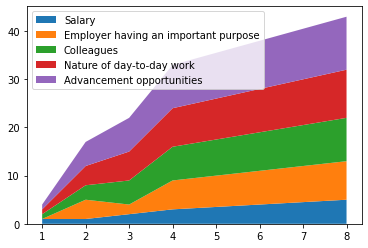

In [303]:

plt.figure(figsize=(15,10))
x=[1,2,3,4,8]
y1=[1,1, 2, 3, 5]
y2=[0,4, 2, 6 ,8]
y3=[1,3, 5, 7,9]
y4=[1,4,6,8,10]
y5=[1,5,7,9,11]
y=np.vstack([y1,y2,y3,y4,y5])
labels=['Salary','Employer having an important purpose','Colleagues','Nature of day-to-day work','Advancement opportunities'] 
fig,ax=plt.subplots()
ax.stackplot(x,y1,y2,y3, y4,y5, labels=labels)
ax.legend(loc='upper left')
plt.show()


Students top concerns when looking for job . in order: Advancement opportunities,Nature of day-to-day work, Colleagues, Employer having an important purpose,Salary.

Extract 4th paragraphy of the text

In [305]:
print (survey.find_all('p')[4].text)

A majority 63% of interns surveyed believe that COVID-19 will lead to increased remote work options and lasting professional flexibility. This positive sentiment toward a virtual future is undoubtedly due to the positive experience described in many of the reviews left by interns who worked remotely: “Goldman Sachs did a wonderful job giving the interns the best experience possible without being in office. The projects I was given to work on really gave me a sense of what I would be doing if I were a full-time employee.” 


Extract 5th paragraphy of the text

In [306]:
print (survey.find_all('p')[5].text)

Despite great experiences during their virtual summer at Goldman Sachs, 75% of the respondents fear that remote work and school will negatively impact their relationships; a concern echoed in a recent Handshake survey about mental health. Perhaps that’s why video calls are so important: 64% of the intern class prefers connecting face-to-face through video, instead of talking on the phone. 


### <span id="2"> Plot 2</span> 

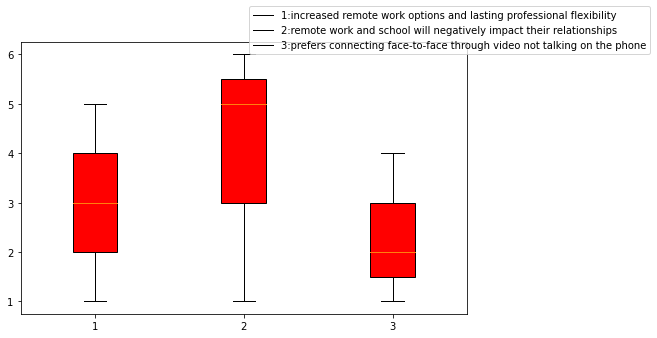

In [307]:
plt.figure(figsize=(8,5))
box=[[1,3,5],[1,5,6],[1,2,4]]
labels=['1:increased remote work options and lasting professional flexibility','2:remote work and school will negatively impact their relationships','3:prefers connecting face-to-face through video not talking on the phone'] 
plt. boxplot(box, patch_artist=True, boxprops=dict(facecolor='r') )
plt.legend(labels, bbox_to_anchor=(0.5, 1.15),loc='upper left') 
plt.show()

63% of interns surveyed believe that COVID-19 will lead to increased remote work options and lasting professional flexibility, 75% of the respondents fear that remote work and school will negatively impact their relationships,64% of the intern  prefers connecting face-to-face through video, instead of talking on the phone.  

### <span id="I">Extract information from another webpage </span> 

In [317]:
url='https://learn.joinhandshake.com/our-team/gen-z-pragmatism-about-the-coming-job-market-debt/'

In [318]:
response3=requests.get(url)

print(response3)

<Response [200]>


newpage=BeautifulSoup(response3.content)


Title of the new text.

In [320]:

for title in newpage. find_all('h1',class_="title" ):
    print(title.get_text())

Data Reveals Gen Z's Pragmatism About the Job Market & Student Debt


Read a paragraphy of the text.

In [331]:
print (newpage.find_all('p')[8].text)

Regarding a potential recession, 57.7% of Gen Z respondents said they are very concerned or somewhat concerned, 30.1% are neutral, and only 13.2% are unconcerned. Perhaps their outlook is influenced in part by their family’s experience of the Great Recession of 2008: 16.4% of respondents said one parent lost a job, 7.9% reported both parents lost their jobs and 20.1% said one or both parents lost wages as a result.


### <span id="3"> Plot 3</span> 

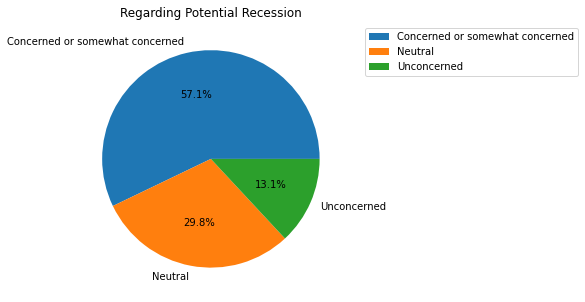

In [326]:
plt.figure(figsize=(8,5))
size=[57.7, 30.1, 13.2]
mylabels=['Concerned or somewhat concerned','Neutral','Unconcerned']
plt. pie(size, labels=mylabels, autopct='%1.1f%%')
plt. legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.title('Regarding Potential Recession')
plt. show()

Regarding a potential recession, 57.7% of Gen Z respondents said they are very concerned or somewhat concerned, 30.1% are neutral, and only 13.2% are unconcerned. 

Read another paragraphy of the text.

In [332]:
print (newpage.find_all('p')[11].text)

This group is also coming to the workforce prepared: 36.3% of students will complete two to three internships before graduation and 76.8% will have at least one. These responses are consistent with their beliefs about the most important tools to land a job. They ranked internships and relevant skills at the top of the list and academic performance third. 


### <span id="4"> Plot 4</span> 

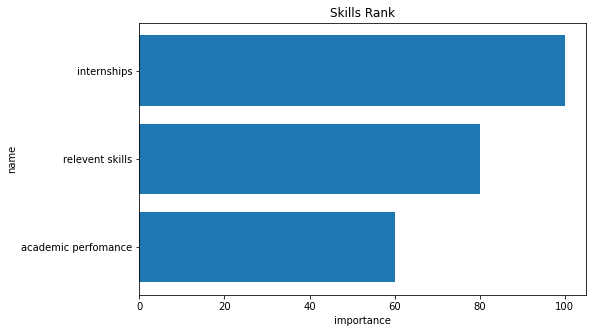

In [348]:
plt.figure(figsize=(8,5))
name = ['academic perfomance','relevent skills','internships']
importance=[60,80,100]


plt.barh(name,importance)
plt. title('Skills Rank')
plt.ylabel('name')
plt.xlabel('importance')
plt.show()

They ranked internships and relevant skills at the top of the list and academic performance third.

### <span id="u">Summary </span> 

After using Beautiful soup to webscrape the HandShake website, I have several findings:
1. I learned 5 top tips to write a cover letter, they are:
    Customize each letter
    Include keywords and supporting details
    Highlight coursework and extracurriculars
    Share what you’d like to accomplish
    Proofread and ask for feedback
2.  Students top concerns when looking for job . in order are: Advancement opportunities,Nature of day-to-day work, Colleagues, Employer having an important purpose,Salary.
3.  In a survey, 63% of interns believe that COVID-19 will lead to increased remote work options, 75% of the respondents fear that remote work and school will negatively impact their relationships,64% of them prefers connection through video, instead of talking on the phone.
4.  Regarding a potential recession, 57.7% of Gen Z respondents express they are very concerned or somewhat concerned, 30.1% are neutral, and only 13.2% are unconcerned.
5.  Students ranked internships and relevant skills at the top of the list and academic performance third.


### <span id="Co">Conclusion</span> 

After exploring this website in depth, I believe Handshake is very useful for students looking for the first job, In Handshake, you not only browse job information, but also are able to access various learning resource which sharp your softskills for interview. 

Considering longterm career development, Advanced opportunity, in other words,the growth of your ablibity brough from the job should be the first piority.

Regarding to COVID_19, students hold different perspectives, some are positive, some are negative. Particularly, in recession time, experience and relevant skills are very important. it is highly recommended that students take at least one internship before graduation. 